###Clasificar a donde pertenecía el vidrio a partir de la concentración de los diferentes elementos químicos que posee. Las clases de vidrio posibles son:


*   Building windows float processed
*   Building windows non float processed
*   Vehicle windows float processed
*   Vehicle windows non float processed
*   Containers
*   Tableware
*   Headlamps








###1) *Curado de datos:* observar bien los labels de este dataset y acomodarlo para que keras lo interprete correctamente

In [1]:
import tensorflow as tf
from urllib import request
import numpy as np
import matplotlib.pyplot as plt

example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/glass.csv"
f = request.urlopen(example1_url)
dataset = np.loadtxt(f, dtype=float, delimiter=",", skiprows=1)

def curar_datos(dataset):
  long = len(dataset[0])
  dataset[:, long-1] -= 1     # Son 7 clases pero en el dataset solo figuran 6. Para que Keras lo interprete bien uso de 0 a 6.

curar_datos(dataset)
print(dataset)

[[ 1.52101 13.64     4.49    ...  0.       0.       0.     ]
 [ 1.51761 13.89     3.6     ...  0.       0.       0.     ]
 [ 1.51618 13.53     3.55    ...  0.       0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  1.64     0.       6.     ]
 [ 1.51651 14.38     0.      ...  1.57     0.       6.     ]
 [ 1.51711 14.23     0.      ...  1.67     0.       6.     ]]


###2) Pensar cuantos parámetros se necesitarán para resolver esta tarea con una activación softmax. Crear el modelo y chequear con el comando summary que efectivamente se haya construido el modelo deseado.

In [2]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(7, input_dim=9))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 70        
                                                                 
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


###3) Usando "loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)", programar con keras el GD. Indicar el learning rate, el patience del early stopping, el riesgo empírico finalmente alcanzado y el correspondiente accuracy

In [21]:
x_train = dataset[:, 0:9]
y_train = dataset[:, 9]
print(x_train)

es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)                             
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.00008), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=x_train, y=y_train, batch_size = 214, epochs=1000,callbacks=[es])

[[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]
Epoch 1/1000
1/1 [==============================] - 0s 257ms/step - loss: 1.2629 - accuracy: 0.4766
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.2598 - accuracy: 0.4720
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.2575 - accuracy: 0.4860
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.2558 - accuracy: 0.4860
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.2545 - accuracy: 0.4766
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.2536 - accuracy: 0.4813
Epoch 7/1000
1/1 [====================

El learning rate elegido fue 0.0008
Patient del early stopping fue 1
Loss fue de: 1.2439
Accuracy fue de: 0.4299

###4) Crear una función que clasifique vidrios, devolviendo el string correspondiente del tipo de vidrio. Pruebelo para (1,52; 13; 3,5; 1,2; 73; 0,6; 9; 0,1; 0,2)

In [22]:
def clasificar_vidrio(entrada):
  prediccion = model.predict(entrada)
  arg_max = np.argmax(prediccion, axis=1)
  return arg_max

print("El vidrio pertenece a clase: ", clasificar_vidrio(np.array([1.52, 13, 3.5, 1.2, 73, 0.6, 9, 0.1, 0.2]).reshape(1,9)))

1/1 [==============================] - 0s 38ms/step
El vidrio pertenece a clase:  [0]


###5) Mostrar la confusion matrix. Puede usar "sklearn.metrics.confusion_matrix".

7/7 [==============================] - 0s 2ms/step


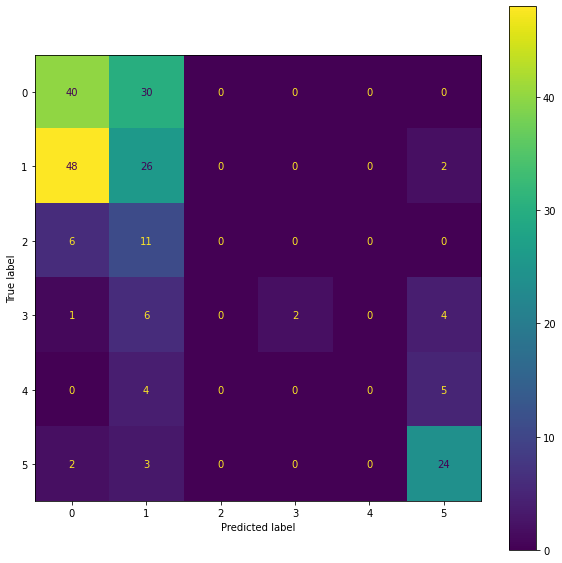

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

y_test = clasificar_vidrio(x_train)

# Plot confusion matrix
fig, ax = plt.subplots(1,1,figsize=(10,10))
dsp = ConfusionMatrixDisplay.from_predictions(y_train,y_test,display_labels=["0", "1", "2", "3", "4", "5", "6"],ax=ax)